<a href="https://colab.research.google.com/github/kkarinakomkova/python-projects/blob/main/Data_Visualization_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/drive/MyDrive/homework/sales_data.csv'
sales = pd.read_csv(file_path)

# Переводжу назви колонок у нижній регістр
sales.columns = sales.columns.str.lower()

Mounted at /content/drive


## **Гістограма** - розподіл прибутку

У розподілі прибутку видно два чіткі моменти:
* ***Перший пік*** — приблизно в діапазоні від 20 до 30. Це свідчить про те, що найбільша кількість транзакцій/замовлень приносить прибуток у цьому діапазоні.
* ***Другий пік*** — орієнтовно в діапазоні від 120 до 130. Це друга «хвиля» частих прибутків, але з більшими значеннями.

Найчастотніші значення:
* ***Перший пік:*** найбільш поширені прибутки — від 20 до 30.
* ***Другий пік:*** другий найбільш поширений діапазон — 120-130.


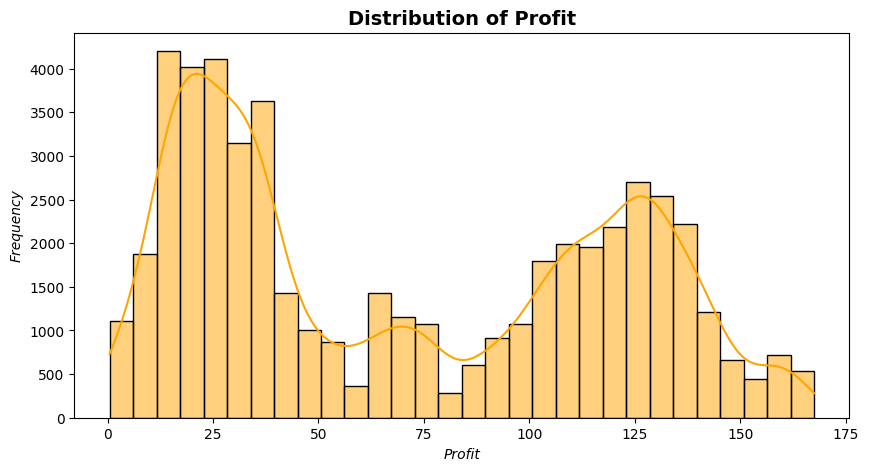

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(sales['profit'], bins=30, kde=True, color="#FFA500")
plt.title("Distribution of Profit", fontsize=14, fontweight="bold")
plt.xlabel("Profit", fontsize=10, fontstyle="italic")
plt.ylabel("Frequency", fontsize=10, fontstyle="italic")
plt.show()

## **Гістограма** - прибутку для продажів, здійснених через веббраузер та мобільний додаток

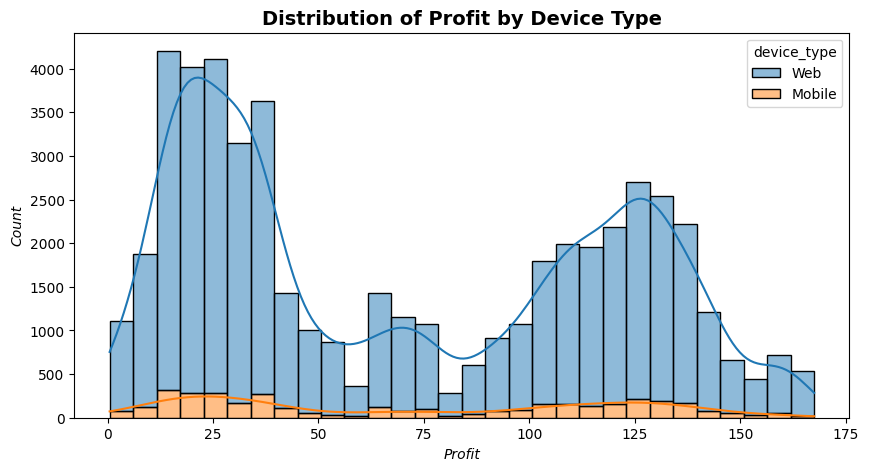

In [ ]:
# Візуалізація на одному графіку
plt.figure(figsize=(10,5))
sns.histplot(data=sales, x="profit", hue="device_type", multiple="stack", bins=30, kde=True)
plt.title("Distribution of Profit by Device Type", fontsize=14, fontweight="bold")
plt.xlabel("Profit", fontsize=10, fontstyle="italic")
plt.ylabel("Count", fontsize=10, fontstyle="italic")
plt.show()

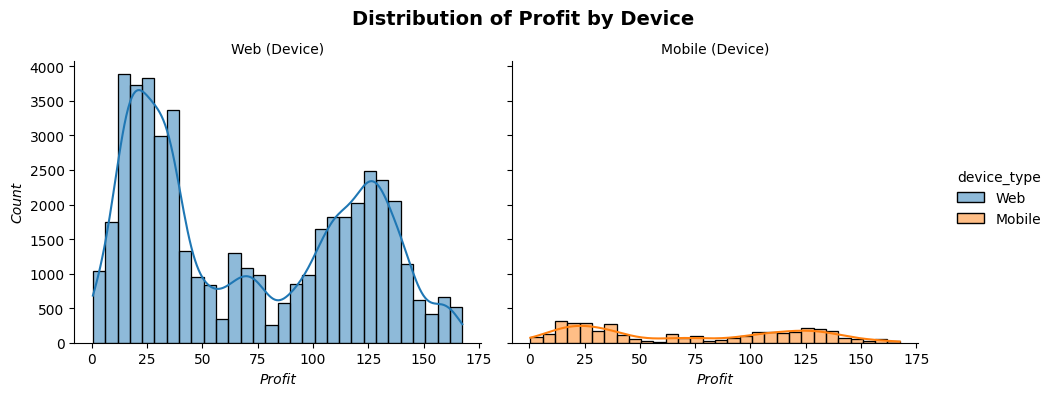

In [ ]:
# Візуалізація на окремих графіках
g = sns.displot(
    data=sales,
    x="profit",
    hue="device_type",
    bins=30,
    kde=True,
    col="device_type",
    height=4,
    aspect=1.2
)

# Індивідуальні заголовки для кожного графіка
g.set_titles(col_template="{col_name} (Device)")

# Загальне оформлення
g.set_axis_labels("Profit", "Count", fontsize=10, fontstyle="italic")
g.fig.suptitle("Distribution of Profit by Device", fontsize=14, fontweight="bold")

# Щоб заголовок не перекривав графіки
g.fig.subplots_adjust(top=0.85)

plt.show()

## **Лінійний графік** - зміна прибутку з часом

Загалом рівень прибутку з плином часу залишається стабільним: то зростає, то знову знижується.

Однак спостерігаються певні винятки та різкі стрибки прибутку. Найвиразніше це помітно у травні та серпні — можливо, у ці місяці продається більше дорогих товарів або відбувається більше продажів.

Цікаво, що у червні фіксується найнижчий рівень прибутку.

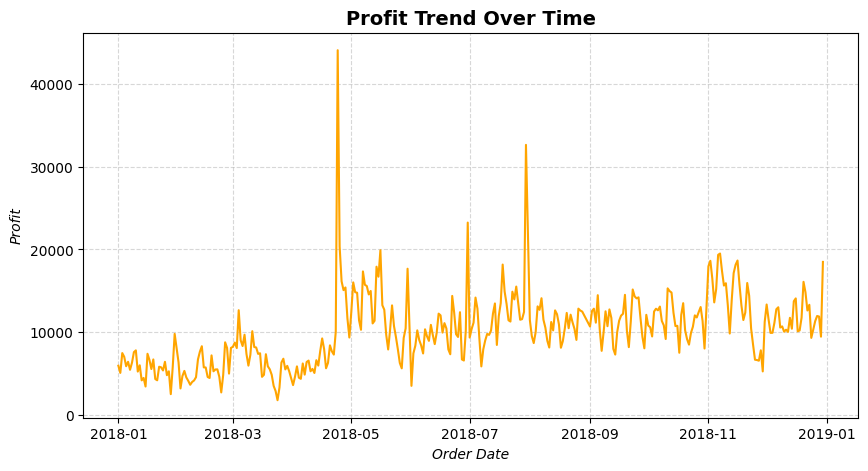

In [ ]:
# змінюю тип даних order_date
sales['order_date']=pd.to_datetime(sales['order_date'], format='%Y-%m-%d')

profit_trend = sales.groupby('order_date')['profit'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="order_date", y="profit", data=profit_trend, errorbar=None, color="#FFA500")

plt.title("Profit Trend Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Order Date", fontsize=10, fontstyle="italic")
plt.ylabel("Profit", fontsize=10, fontstyle="italic")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## **Стовпчикова діаграма** - загальний прибуток за категоріями товарів

Загальний прибуток від категорії "Мода" значно перевищує доходи від інших категорій, що робить її найбільш прибутковою.

Водночас категорія "Електроніка" приносить найменший дохід, ймовірно, через високу вартість товарів цієї категорії, що обмежує кількість покупок.

Загалом, розподіл покупців між чоловіками та жінками в різних категоріях є досить збалансованим. Однак існують помітні відмінності в покупательських перевагах: у категоріях "Авто та аксесуари" і "Мода" переважають чоловіки, що може свідчити про більшу зацікавленість цих товарів серед чоловічої аудиторії. Натомість у категоріях "Електроніка" та "Дім і меблі" жінки приносять більше прибутку, що може бути пов'язано з їхнім більш активним попитом на техніку та предмети для дому.

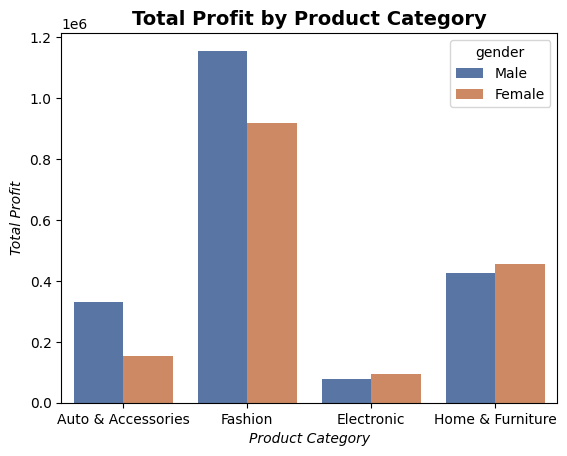

In [ ]:
sns.barplot(data=sales, x="product_category", y="profit", hue="gender", estimator=np.sum, errorbar=("ci", False), palette="deep")
plt.title("Total Profit by Product Category", fontsize=14, fontweight="bold")
plt.xlabel("Product Category", fontsize=10, fontstyle="italic")
plt.ylabel("Total Profit", fontsize=10, fontstyle="italic")
plt.show()